In [1]:
import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

In [2]:
input_dir = "../../../../../results/method_comparison/compare_algorithms/vanGalen/community/"

In [3]:
data = counts = sc.read_mtx("/work/project/ladcol_013/algo_ulc/pdata/counts_norm.mtx",'float64').T

In [4]:
anno_cells = pd.read_csv("/work/project/ladcol_013/algo_ulc/pdata/anno_cells_norm.txt", sep = "\t") 
anno_samples = pd.read_csv("/work/project/ladcol_013/algo_ulc/pdata/anno_samples_norm.txt", sep = "\t") 
anno_genes = pd.read_csv( "/work/project/ladcol_013/algo_ulc/pdata/anno_genes_norm.txt", sep = "\t") 

In [5]:
data.var_names=anno_genes['gene_symbol']
print("data.var_names[1:10]")
print(data.var_names[1:10])
data.var = anno_genes
data.var.index = data.var.index.astype(str)

data.var_names[1:10]
Index(['A1CF', 'A2M', 'A4GALT', 'AAAS', 'AACS', 'AAED1', 'AAGAB', 'AAK1',
       'AAMDC'],
      dtype='object', name='gene_symbol')


In [6]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(0.7, 0.7, 0.7), (1, 0, 0)] # From gray to red
cmap_name = 'gray_to_red'
colormap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

In [7]:
data.obs_names=anno_cells['cell_ID']
print(data.obs_names[1:10])
data.obs = anno_cells
data.obs.index = data.obs.index.astype(str)

Index(['N10.EpiA.AACCCAGACGTAAC', 'N10.EpiA.AATCTCACCGCATA',
       'N10.EpiA.ACAATAACCGCTAA', 'N10.EpiA.ACAATTGATGCAGT',
       'N10.EpiA.ACAGTGTGTTGGTG', 'N10.EpiA.ACCGTGCTACTCAG',
       'N10.EpiA.ACGAGGGAACCTAG', 'N10.EpiA.ACGCAATGGTAGCT',
       'N10.EpiA.ACTACGGAAAGAAC'],
      dtype='object', name='cell_ID')


In [8]:
# make column health_status_patient_ID
annot = []
annot=data.obs["health_status"].astype('str')+"_"+data.obs["sample_ID"].astype('str')
data.obs["health_status_patient_ID"] = annot

In [9]:
data.uns["health_status_colors"] = ["#7C001F" # bordeau for Colitis
                                    , "#7ac5cd" # CadetBlue3 for Healthy
                                    ]

In [10]:
# gene=anno_genes.gene_symbol[1:10].to_list()

In [11]:
data

AnnData object with n_obs × n_vars = 93593 × 13861
    obs: 'cell_ID', 'cell_type_original', 'tissue_type', 'cell_type', 'region', 'sample_ID', 'health_status', 'total_counts_raw', 'nr_genes', 'counts_upper_threshold', 'counts_lower_threshold', 'genes_lower_threshold', 'counts_upper_filter', 'counts_lower_filter', 'genes_lower_filter', 'cell_filter', 'threshold_celltype_size', 'celltype_size_cf', 'celltype_size_filter', 'cell_type_ID', 'total_counts_raw_cf_ctf_gf', 'total_counts_raw_cf_ctf_gf_sf', 'sizeFactor', 'health_status_patient_ID'
    var: 'gene_symbol', 'inDB', 'isLigand', 'isReceptor', 'sum_pseudobulkCellType_expr', 'sum_pseudobulkCellType_expr_threshold', 'sum_pseudobulkCellType_expr_filter'
    uns: 'health_status_colors'

In [13]:
cell_type_list=["Enterocytes"]
genes_list=["MST1","BEST4","NOS2","DDAH2","SMAD3","JAK2"]

In [14]:
def plot_stacked(adata,cell_type_list,gene_list):
    
    subset_data=adata[adata.obs["cell_type"].isin(cell_type_list)]

    sc.pl.stacked_violin(subset_data
                       ,groupby="health_status_patient_ID"#"health_status_patient_ID",
                        ,var_names=genes_list,
                        swap_axes=True,
                        cmap="YlGnBu"
                        ,stripplot=True
                        ,jitter=True
                        ,return_fig=True
                        #,save="by_individual_"+cell_type+"_"+gene+".pdf"
                        ).add_totals().show()

In [63]:
def plot_violin(adata, cell_type_list, gene_list):
    title_text = f"{cell_type_list[0]}: {gene_list[0]}"
    
    subset_data = adata[adata.obs["cell_type"].isin(cell_type_list)]
    ax = sc.pl.violin(subset_data,
                      groupby='health_status',
                      keys=gene_list,
                      order=["Healthy", "Colitis"],
                      stripplot=True,
                      jitter=0.4,
                      size=4,
                      show=False)
    
    plt.title(title_text)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


In [16]:
sc.tl.pca(data, svd_solver='arpack')
# sc.pl.pca_variance_ratio(data)

In [19]:
sc.pp.neighbors(data)
sc.tl.umap(data)

In [20]:
def plot_umap(adata,cell_type_list,gene_list):

    control=adata[adata.obs["health_status"]=="Healthy"]
    
    case=adata[adata.obs["health_status"]=="Colitis"]

    
    
    control=control[control.obs["cell_type"].isin(cell_type_list)]

    case=case[case.obs["cell_type"].isin(cell_type_list)]


    sc.pl.umap(control
               , color=gene_list, title=["Healthy" + x for x in genes_list],cmap=colormap
              )


    sc.pl.umap(case
               , color=gene_list, title=["Colitis" + x for x in genes_list],cmap=colormap
              )

In [21]:
data.var_names=anno_genes['gene_symbol']

In [22]:
import warnings
warnings.filterwarnings('ignore')

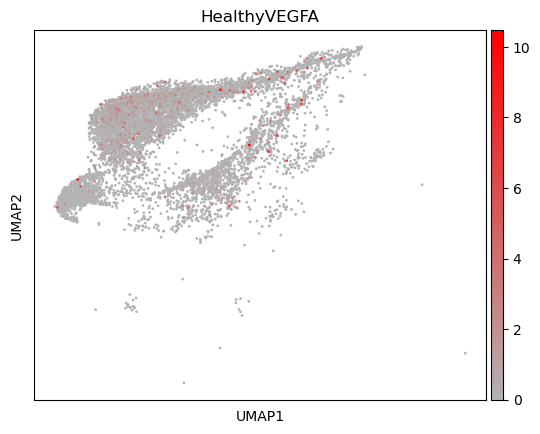

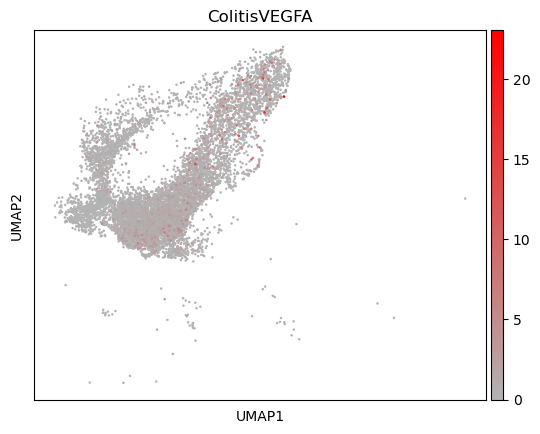

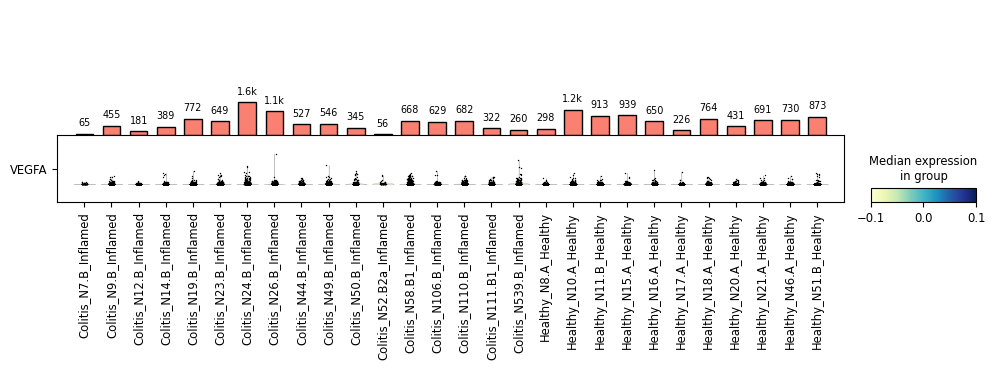

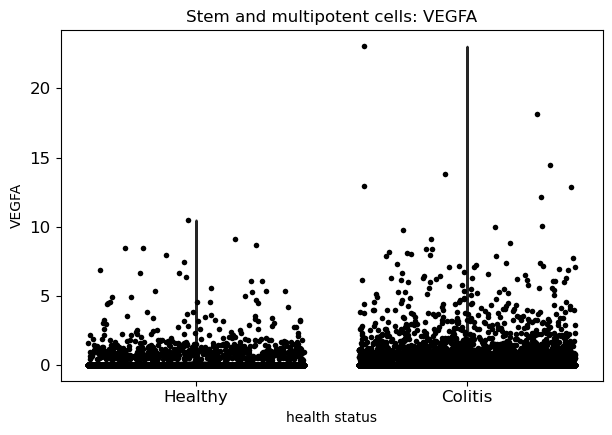

In [66]:
cell_type_list=["Stem and multipotent cells"]
genes_list=["VEGFA"]

plot_umap(data,cell_type_list,genes_list)
plot_stacked(data,cell_type_list,genes_list)
plot_violin(data,cell_type_list,genes_list)

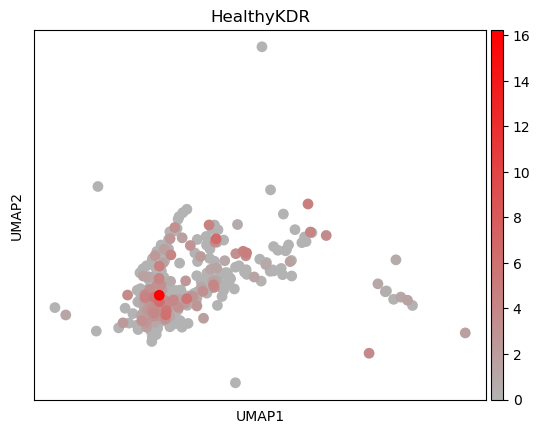

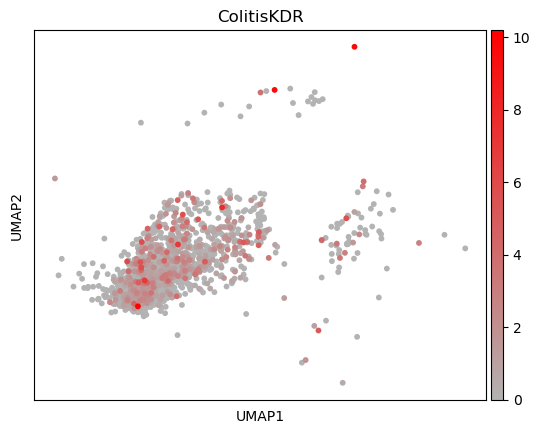

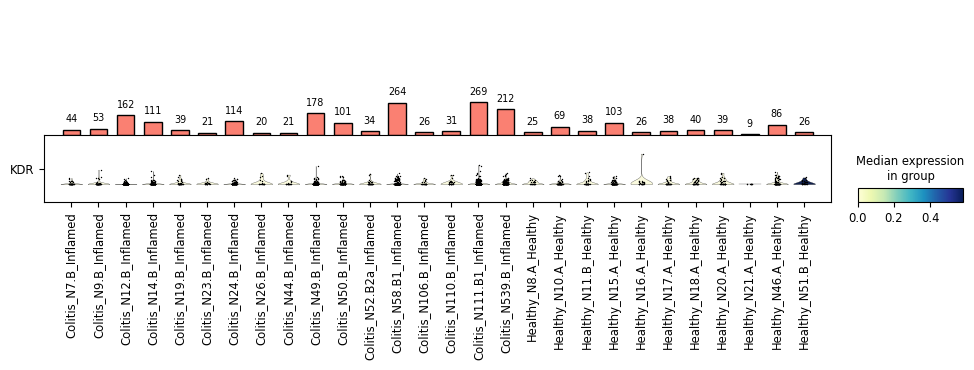

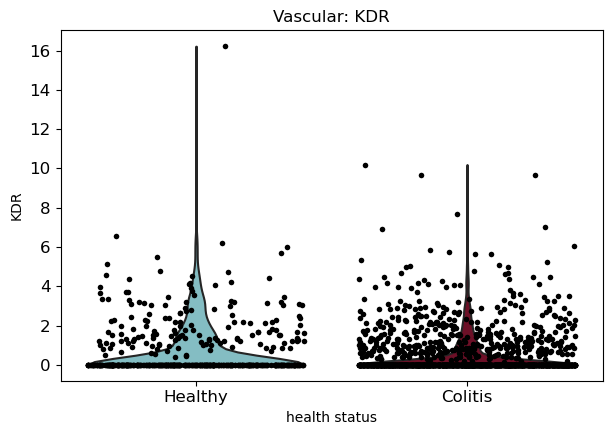

In [32]:
cell_type_list=["Vascular"]
genes_list=["KDR"]

plot_umap(data,cell_type_list,genes_list)
plot_stacked(data,cell_type_list,genes_list)
plot_violin(data,cell_type_list,genes_list)

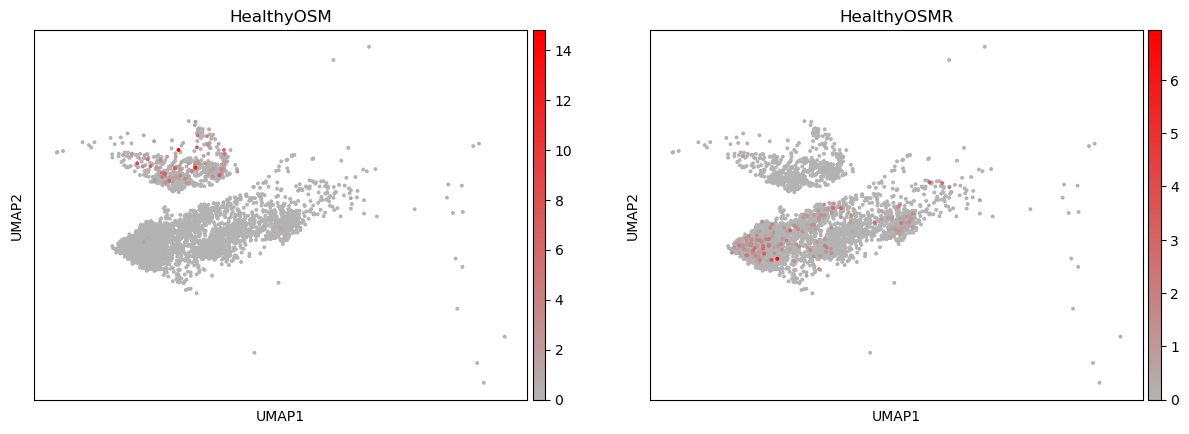

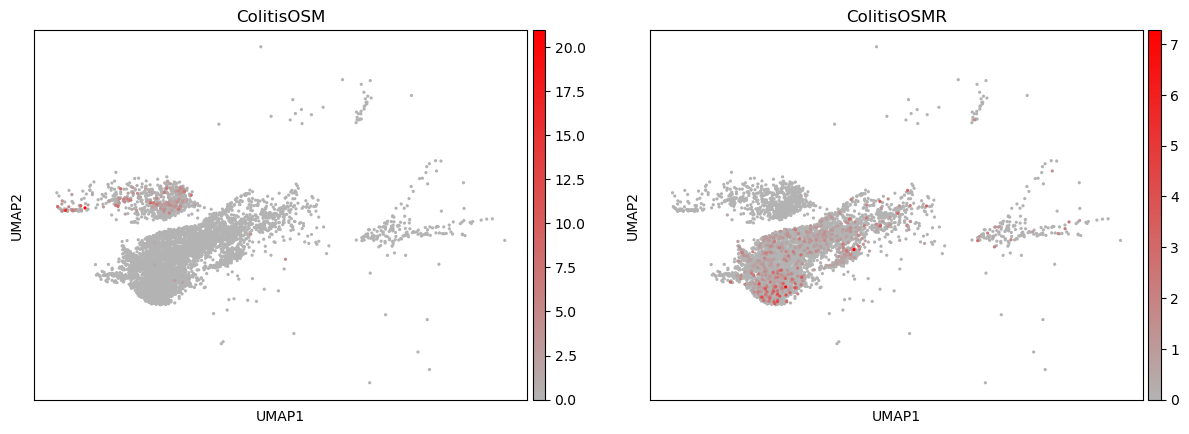

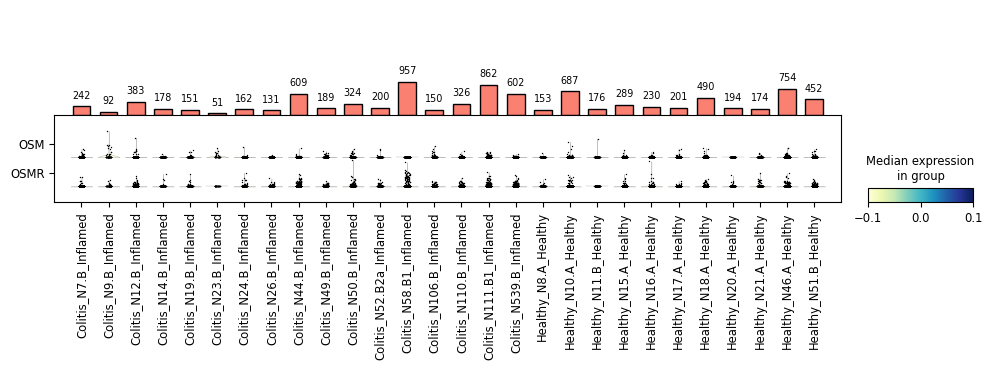

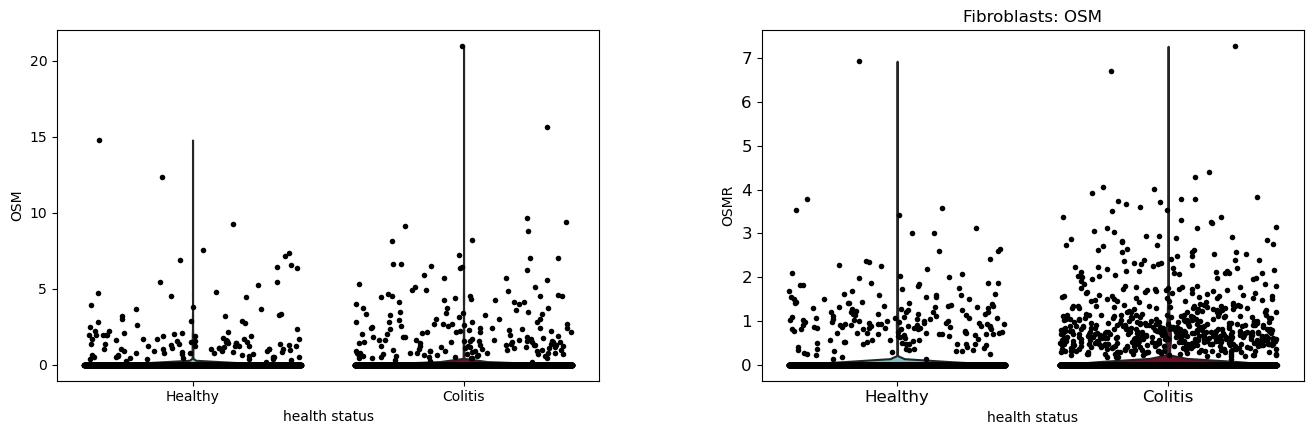

In [37]:
cell_type_list=["Fibroblasts","Myeloid"]
genes_list=["OSM","OSMR"]
plot_umap(data,cell_type_list,genes_list)
plot_stacked(data,cell_type_list,genes_list)
plot_violin(data,cell_type_list,genes_list)

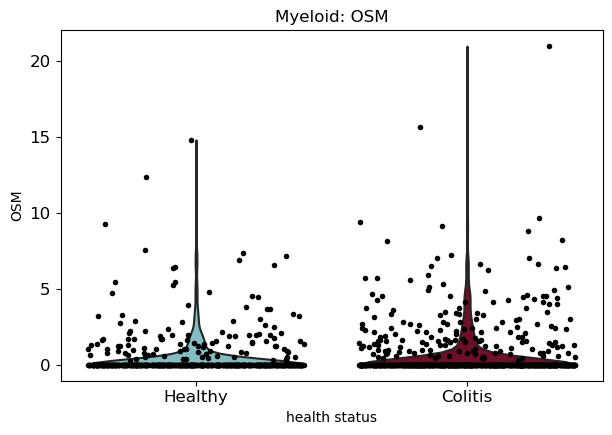

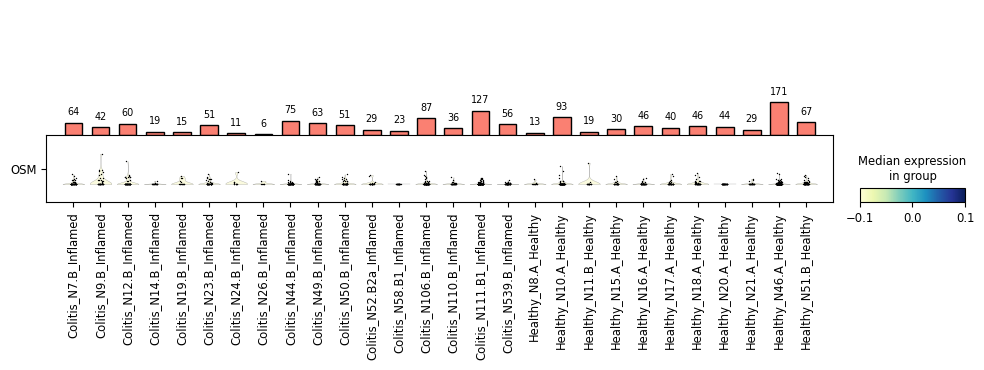

In [69]:
cell_type_list=["Myeloid"]
genes_list=["OSM"]
plot_violin(data,cell_type_list,genes_list)
plot_stacked(data,cell_type_list,genes_list)

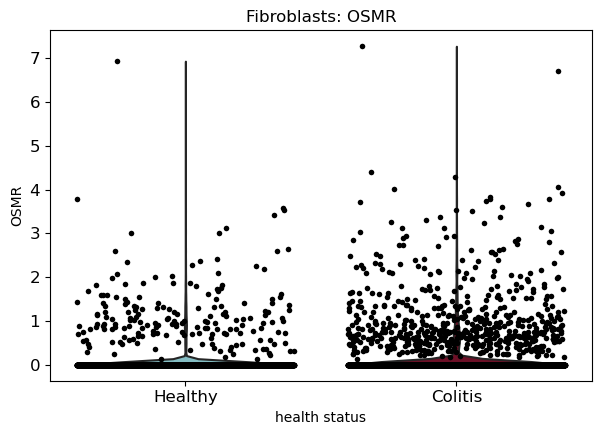

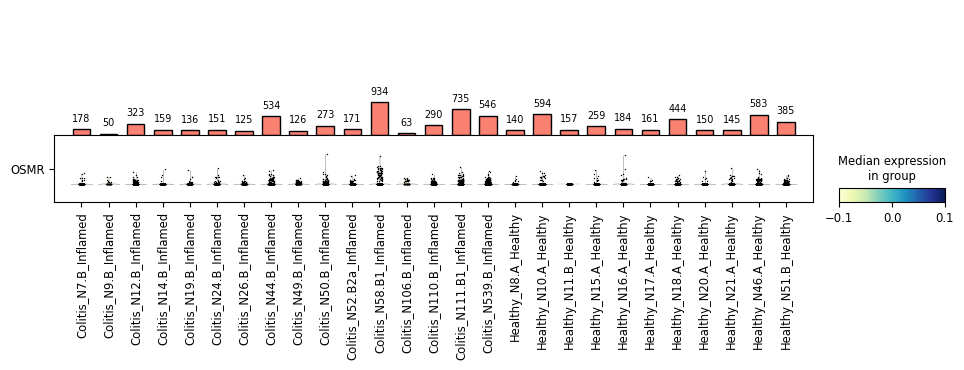

In [70]:
cell_type_list=["Fibroblasts"]
genes_list=["OSMR"]
plot_violin(data,cell_type_list,genes_list)
plot_stacked(data,cell_type_list,genes_list)

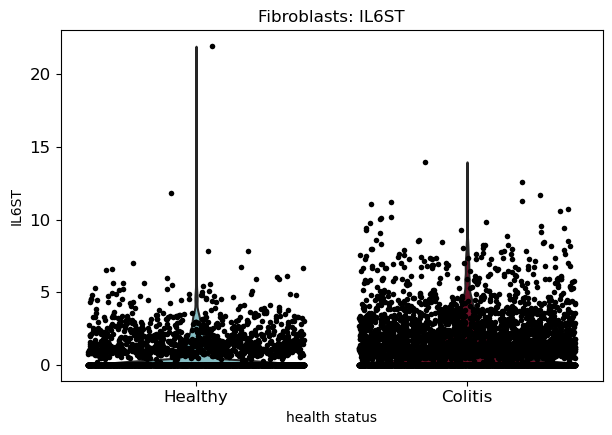

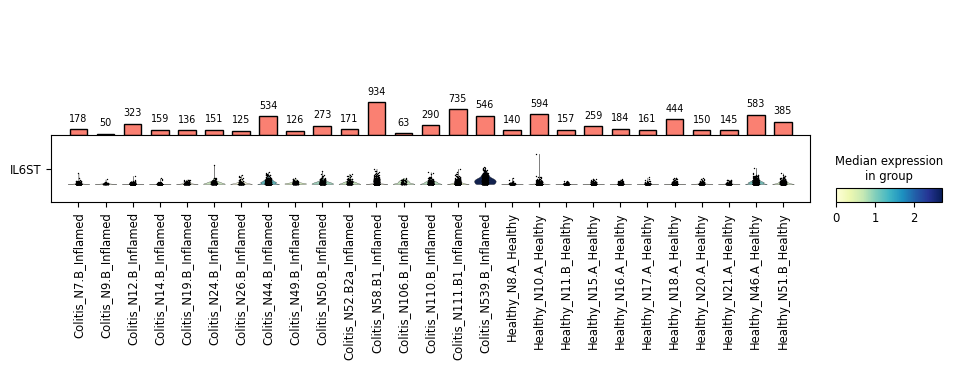

In [71]:
cell_type_list=["Fibroblasts"]
genes_list=["IL6ST"]
plot_violin(data,cell_type_list,genes_list)
plot_stacked(data,cell_type_list,genes_list)

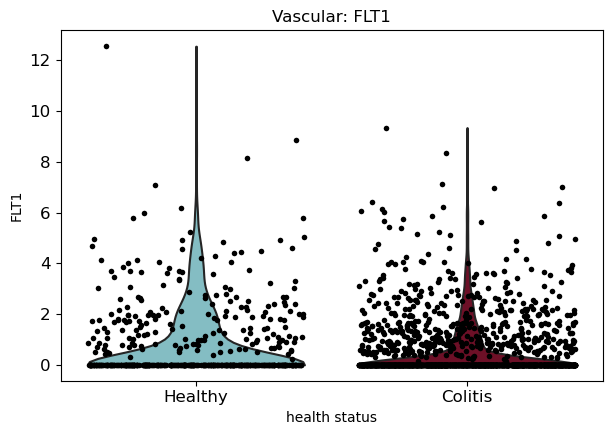

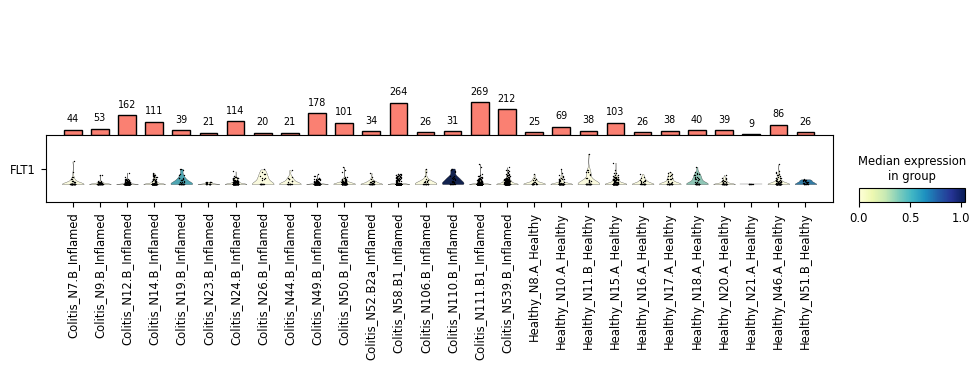

In [44]:
cell_type_list=["Vascular"]
genes_list=["FLT1"]
plot_violin(data,cell_type_list,genes_list)
plot_stacked(data,cell_type_list,genes_list)